<AxesSubplot:title={'center':'pcamad - roc: 1.0'}, xlabel='0', ylabel='1'>

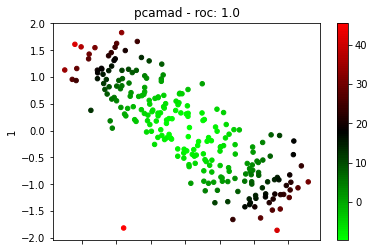

In [4]:
from src.pca_mad import PCAMAD
from sklearn.metrics import roc_auc_score
from src.utils.load_utils import load_local_mat
from sklearn.preprocessing import RobustScaler
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd

cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))}
cmap = mcolors.LinearSegmentedColormap('cmp', cdict, 100)

data = load_local_mat('./src/utils', 'testdata')
y = data.labels

Xdata = RobustScaler(with_centering=True, with_scaling=True, unit_variance=True).fit_transform(data.values)  

pcamad = PCAMAD()
pcamad.fit(Xdata)

roc5 = roc_auc_score(y, pcamad.decision_scores_)
pd.DataFrame(Xdata).plot.scatter(x=0, y=1, c=pcamad.decision_scores_, cmap=cmap, title=f'pcamad - roc: {round(roc5,3)}')